/tmp/ipykernel_201596/1906672892.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  return -1 / t_beta if quark in ["d", "l"] else 1 / t_beta
/tmp/ipykernel_201596/1906672892.py:62: RuntimeWarning: invalid value encountered in double_scalars
  return hpcs(mhp, t_beta, type) / (hpcs(mhp, t_beta, type) + hpcb(mhp, t_beta, type) + hplv(mhp, t_beta, type))
/tmp/ipykernel_201596/1906672892.py:56: RuntimeWarning: invalid value encountered in double_scalars
  return hpcb(mhp, t_beta, type) / (hpcs(mhp, t_beta, type) + hpcb(mhp, t_beta, type) + hplv(mhp, t_beta, type))
/tmp/ipykernel_201596/1906672892.py:59: RuntimeWarning: invalid value encountered in double_scalars
  return hplv(mhp, t_beta, type) / (hpcs(mhp, t_beta, type) + hpcb(mhp, t_beta, type) + hplv(mhp, t_beta, type))


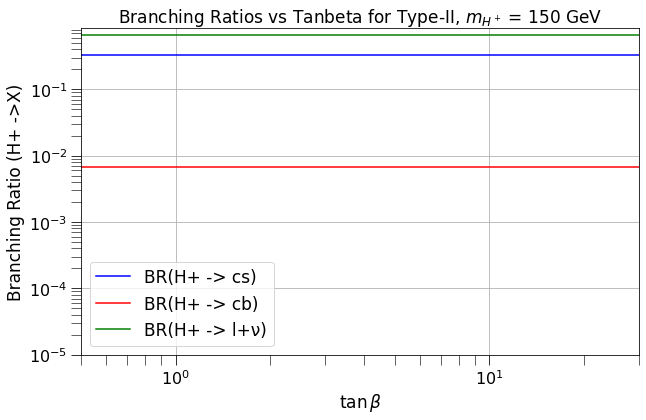

In [100]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

# Constants
mt = 173  # Top quark mass
mb = 4.17  # Bottom quark mass
mc = 1.29  # Charm quark mass
ms = 0.095  # Strange quark mass
ml = 1.77  # Tau lepton mass
Gf = 1.16637e-5  # Fermi constant
vtb = 0.99  # CKM matrix element vtb
sigmatt = 830  # p p > t t~ at NNLO in QCD in pb
nc = 3  # Color factor
vcs = 0.97  # CKM matrix element for cs
vcb = 0.0412  # CKM matrix element for cb

# Helper Functions
def lambda_function(x, y):
    return 1 + x**2 + y**2 - 2 * x - 2 * y - 2 * x * y

def xi_function(t_beta, type, quark):
    if type == "X":
        return t_beta if quark == "l" else 1 / t_beta
    elif type == "I":
        return -1 / t_beta if quark in ["d", "l"] else 1 / t_beta
    elif type == "II":
        return t_beta if quark in ["d", "l"] else 1 / t_beta
    elif type == "Y":
        return -(1 / t_beta) if quark in ["l", "u"] else t_beta

def beta_cs(mhp):
    return lambda_function(mc**2 / mhp**2, ms**2 / mhp**2)**0.5

def beta_cb(mhp):
    return lambda_function(mc**2 / mhp**2, mb**2 / mhp**2)**0.5

# Charged Higgs Decay Functions
def hpcs(mhp, t_beta, type):
    xi_u = xi_function(t_beta, type, "u")
    xi_d = xi_function(t_beta, type, "d")
    return Gf**2 * mhp * (xi_u**2 * vcs**2 * mc**2 + xi_d**2 * vcs**2 * ms**2) * beta_cs(mhp)**3

def hpcb(mhp, t_beta, type):
    xi_u = xi_function(t_beta, type, "u")
    xi_d = xi_function(t_beta, type, "d")
    return Gf**2 * mhp * (xi_u**2 * vcb**2 * mc**2 + xi_d**2 * vcb**2 * mb**2) * beta_cb(mhp)**3

def hplv(mhp, t_beta, type):
    xi_l = xi_function(t_beta, type, "l")
    return Gf**2 * mhp * xi_l**2 * ml**2 * (1 - ml**2 / mhp**2)**2

# Branching Ratios
def br_hpcb(mhp, t_beta, type):
    return hpcb(mhp, t_beta, type) / (hpcs(mhp, t_beta, type) + hpcb(mhp, t_beta, type) + hplv(mhp, t_beta, type))

def br_hplv(mhp, t_beta, type):
    return hplv(mhp, t_beta, type) / (hpcs(mhp, t_beta, type) + hpcb(mhp, t_beta, type) + hplv(mhp, t_beta, type))

def br_hpcs(mhp, t_beta, type):
    return hpcs(mhp, t_beta, type) / (hpcs(mhp, t_beta, type) + hpcb(mhp, t_beta, type) + hplv(mhp, t_beta, type))

# Charged Higgs Production in Light Higgs Scenario
def sigma_hp_light(mhp, t_beta, type):
    br = br_hpcs(mhp, t_beta, type) + br_hpcb(mhp, t_beta, type) + br_hplv(mhp, t_beta, type)
    return 2*sigmatt * br * (1 - br)

# Example Calculation
mhp_example = 150
t_beta_example = 10
type_example = "X"


# Fixed values
mhp_fixed = 150  # Fixed mass of charged Higgs
type_fixed = "I"  # Fixed type

# Tanbeta range
tanbeta_values = np.linspace(0, 30, 1000)  # Tanbeta from 1 to 30, with 100 points

# Initialize arrays for branching ratios
br_hpcs_values = []
br_hpcb_values = []
br_hplv_values = []

# Calculate branching ratios for each tanbeta
for t_beta in tanbeta_values:
    br_hpcs_values.append(br_hpcs(mhp_fixed, t_beta, type_fixed))
    br_hpcb_values.append(br_hpcb(mhp_fixed, t_beta, type_fixed))
    br_hplv_values.append(br_hplv(mhp_fixed, t_beta, type_fixed))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(tanbeta_values, br_hpcs_values, label='BR(H+ -> cs)', color='blue')
plt.plot(tanbeta_values, br_hpcb_values, label='BR(H+ -> cb)', color='red')
plt.plot(tanbeta_values, br_hplv_values, label='BR(H+ -> l+ν)', color='green')

plt.title('Branching Ratios vs Tanbeta for Type-II, $m_{H^+}$ = 150 GeV', fontsize=17)
plt.xlabel('$\\tan\\beta$', fontsize=17)
plt.ylabel('Branching Ratio (H+ ->X)', fontsize=17)
plt.xscale('log')  # Set the y-axis to logarithmic scale
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.xlim(0.5 , 30)
plt.ylim(0.00001)
# Customizing tick parameters
plt.tick_params(axis='both', which='major', labelsize=16 ,length=10)
plt.tick_params(axis='both', which='minor', labelsize=16 ,length=10)
plt.legend(fontsize=17)
plt.grid()
plt.show()


In [40]:
type_fixed = "X"  # Assuming 'X' type or set this to the relevant type
# Function to print branching ratios for given tan beta (tβ) and charged Higgs mass (mhp)
def print_branching_ratios(mhp, tβ):
    br_lvX = br_hplv(mhp, tβ ,type_fixed)
    br_csX = br_hpcs(mhp, tβ , type_fixed)
    br_cbX = br_hpcb(mhp, tβ, type_fixed)

    return {
        "BrlvX (Lepton-Neutrino)": br_lvX,
        "BrcsX (Charm-Strange)": br_csX,
        "BrcbX (Charm-Bottom)": br_cbX
    }

# Example values for tan beta and mh+
#tan_beta = 10
#mh_plus = 100

# Print the branching ratios
print_branching_ratios(10, 100)

{'BrlvX (Lepton-Neutrino)': 0.6601703352487364,
 'BrcsX (Charm-Strange)': 2.0359035558770875e-09,
 'BrcbX (Charm-Bottom)': 0.003750649445880198}

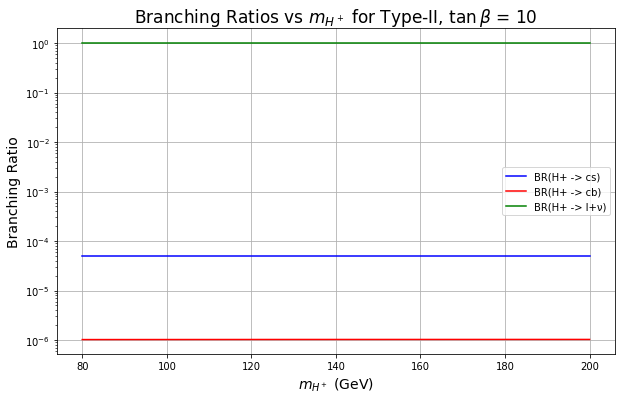

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# [Constants and Helper Functions remain the same]

# Fixed tanbeta value
tanbeta_fixed = 10

# mH+ range
mhp_values = np.linspace(80, 200, 1000)  # mH+ from 80 to 200 GeV, with 1000 points

# Initialize arrays for branching ratios
br_hpcs_values_mhp = []
br_hpcb_values_mhp = []
br_hplv_values_mhp = []

# Calculate branching ratios for each mH+
for mhp in mhp_values:
    br_hpcs_values_mhp.append(br_hpcs(mhp, tanbeta_fixed, type_fixed))
    br_hpcb_values_mhp.append(br_hpcb(mhp, tanbeta_fixed, type_fixed))
    br_hplv_values_mhp.append(br_hplv(mhp, tanbeta_fixed, type_fixed))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mhp_values, br_hpcs_values_mhp, label='BR(H+ -> cs)', color='blue')
plt.plot(mhp_values, br_hpcb_values_mhp, label='BR(H+ -> cb)', color='red')
plt.plot(mhp_values, br_hplv_values_mhp, label='BR(H+ -> l+ν)', color='green')

plt.title('Branching Ratios vs $m_{H^+}$ for Type-II, $\\tan\\beta$ = 10', fontsize=17)
plt.xlabel('$m_{H^+}$ (GeV)', fontsize=14)
plt.ylabel('Branching Ratio', fontsize=14)
#plt.ylim(0, 1)  # Adjusting y-axis limits to [0, 1]
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()


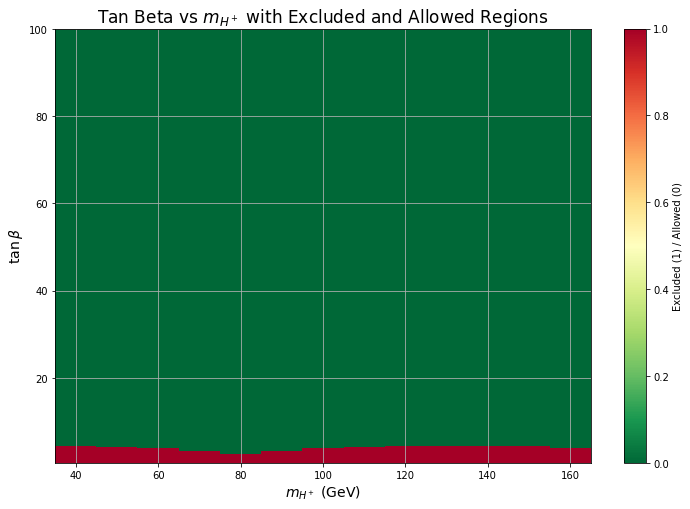

In [110]:
import matplotlib.pyplot as plt

# Assuming the rest of the necessary functions and constants are defined earlier

# Br values for different mH values (observed upper limits)
br_values_dict = {
    40: 0.0013,
    50: 0.0016,
    60: 0.0019,
    70: 0.0044,
    80: 0.0107,
    90: 0.0049,
    100: 0.0021,
    110: 0.0015,
    120: 0.0014,
    130: 0.0014,
    140: 0.0013,
    150: 0.0013,
    160: 0.0021
}

# Prepare mH+ and tanBeta values for plotting
tanbeta_values = np.linspace(0.5, 100, 500)  # tanBeta from 0.5 to 100
mhp_values = sorted(br_values_dict.keys())  # mH+ values from the dictionary

# Create a meshgrid for plotting
mhp_grid, tanbeta_grid = np.meshgrid(mhp_values, tanbeta_values)

# Initialize a matrix to store exclusion information
exclusion_matrix = np.zeros_like(mhp_grid)

# Calculate and compare BRs for each point in the grid
for i, mhp in enumerate(mhp_values):
    empirical_br = br_values_dict[mhp]
    for j, t_beta in enumerate(tanbeta_values):
        calculated_br = br_hpcs(mhp, t_beta, type_fixed)  # Calculate BR for H+ -> cs
        exclusion_matrix[j, i] = calculated_br > empirical_br  # Mark excluded if calculated BR exceeds empirical BR

# Plotting
plt.figure(figsize=(12, 8))
plt.pcolormesh(mhp_grid, tanbeta_grid, exclusion_matrix, cmap='RdYlGn_r', shading='auto')
plt.colorbar(label='Excluded (1) / Allowed (0)')

plt.title('Tan Beta vs $m_{H^+}$ with Excluded and Allowed Regions', fontsize=17)
plt.xlabel('$m_{H^+}$ (GeV)', fontsize=14)
plt.ylabel('$\\tan\\beta$', fontsize=14)
plt.grid()
plt.show()



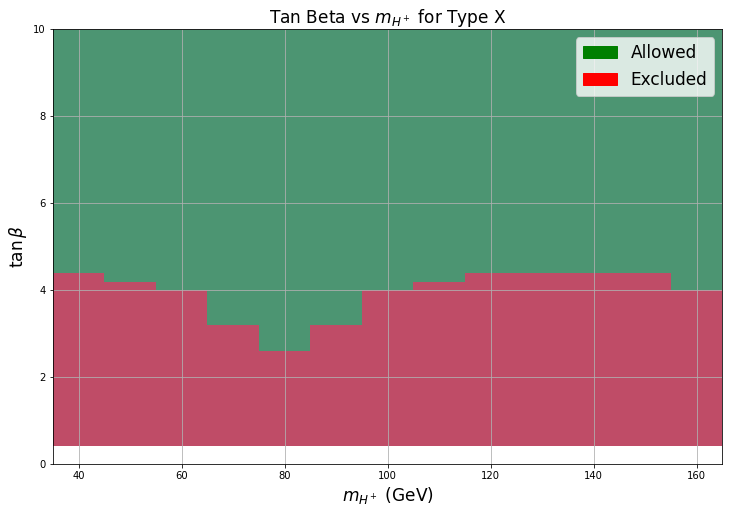

In [112]:
# Re-plotting with explicit legends for allowed and excluded regions

plt.figure(figsize=(12, 8))

# Plotting the excluded and allowed regions
plt.pcolormesh(mhp_grid, tanbeta_grid, exclusion_matrix, cmap='RdYlGn_r', shading='auto',alpha=0.7)

# Adding a legend
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['green', 'red'])
labels = ['Allowed', 'Excluded']
patches = [plt.Rectangle((0,0),1,1, color=cmap(i)) for i in range(2)]
plt.legend(patches, labels, loc='upper right',fontsize=17)

# Titles and labels
plt.title('Tan Beta vs $m_{H^+}$ for Type X', fontsize=17)
plt.xlabel('$m_{H^+}$ (GeV)', fontsize=17)
plt.ylabel('$\\tan\\beta$', fontsize=17)
plt.ylim(70,100)
plt.ylim(0,10)
plt.grid()

plt.show()



In [109]:
type_fixed = "X"  # Assuming 'X' type or set this to the relevant type